In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Prepare synthetic anomaly detection dataset**

In [ ]:
np.random.seed(42)

# ---------------------------
# Small dataset
# ---------------------------
normal_small = np.random.randn(300, 2)
anom_small = 4 + 1.5 * np.random.randn(10, 2)

data_small = np.vstack([normal_small, anom_small])
labels_small = np.concatenate([np.ones(len(normal_small)), np.zeros(len(anom_small))])

# ---------------------------
# Medium dataset
# ---------------------------
n_samples_med = 3000
anomaly_ratio_med = 0.05   # 5% anomalies
n_features_med = 5

n_anom_med = int(n_samples_med * anomaly_ratio_med)
n_norm_med = n_samples_med - n_anom_med

normal_med = np.random.randn(n_norm_med, n_features_med)
anom_med = 4 + 1.5 * np.random.randn(n_anom_med, n_features_med)

data_med = np.vstack([normal_med, anom_med])
labels_med = np.concatenate([np.ones(len(normal_med)), np.zeros(len(anom_med))])

# ---------------------------
# Big dataset
# ---------------------------
n_samples_big = 10000
anomaly_ratio_big = 0.08   # 8% anomalies
n_features_big = 10

n_anom_big = int(n_samples_big * anomaly_ratio_big)
n_norm_big = n_samples_big - n_anom_big

normal_big = np.random.randn(n_norm_big, n_features_big)
anom_big = 4 + 1.5 * np.random.randn(n_anom_big, n_features_big)

data_big = np.vstack([normal_big, anom_big])
labels_big = np.concatenate([np.ones(len(normal_big)), np.zeros(len(anom_big))])

# ---------------------------
# Function to show ratios of datasets
# ---------------------------
def show_ratio(data, labels, name):
    n_total = len(labels)
    n_anom = np.sum(labels == 0)
    ratio = n_anom / n_total
    n_features = data.shape[1]
    print(f"{name} -> Total: {n_total}, Features: {n_features}, Anomalies: {n_anom}, Ratio: {ratio:.2%}")

# Display ratios
show_ratio(data_small, labels_small, "Small dataset")
show_ratio(data_med, labels_med, "Medium dataset")
show_ratio(data_big, labels_big, "Big dataset")

Small dataset -> Total: 310, Features: 2, Anomalies: 10, Ratio: 3.23%
Medium dataset -> Total: 3000, Features: 5, Anomalies: 150, Ratio: 5.00%
Big dataset -> Total: 10000, Features: 10, Anomalies: 800, Ratio: 8.00%


In [ ]:
# ---------------------------
# Function to print true anomaly labels
# ---------------------------
def print_anomalies(data, labels, name, max_print=5):
    anomaly_indices = np.where(labels == 0)[0]
    print(f"\n{name} -> Indices of anomalies: {anomaly_indices}")
    print(f"First {max_print} anomaly points:\n{data[anomaly_indices[:max_print]]}")

# **Anomaly detection using KNN**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

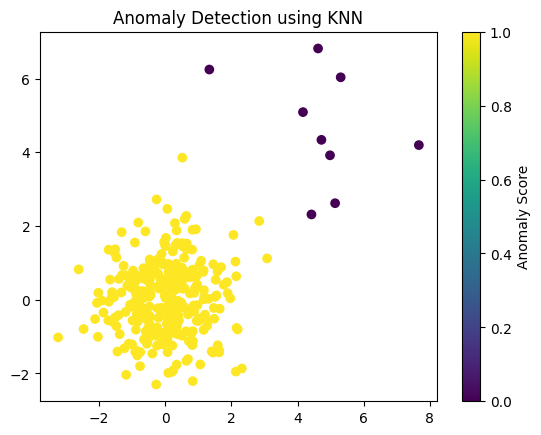

Detected anomalies: [300 301 302 304 305 306 307 308 309]


In [ ]:
data = data_small
labels = labels_small

# Initialize and fit the KNN model
k = 5  # Adjust the number of neighbors as needed
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(data, labels)

# Predict whether each data point is an anomaly (0 for anomalies, 1 for normal data)
predictions = clf.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using KNN")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == 0)[0]
print("Detected anomalies:", anomalies_indices)

In [ ]:
print_anomalies(data_small, labels_small, "Small dataset")


Small dataset -> Indices of anomalies: [300 301 302 303 304 305 306 307 308 309]
First 5 anomaly points:
[[5.13548292 2.61675201]
 [5.30440888 6.03345679]
 [4.62015235 6.81519372]
 [2.8393162  2.13301795]
 [1.33191963 6.24406647]]


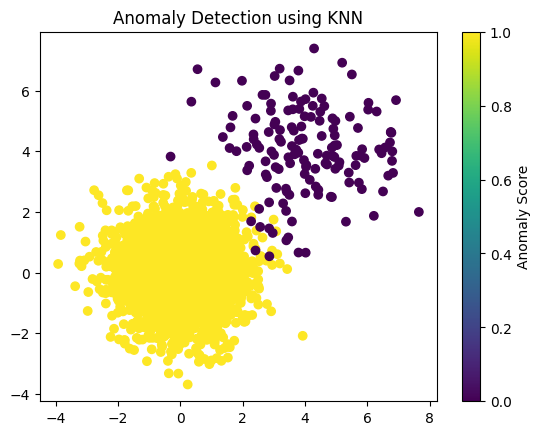

Detected anomalies: [2850 2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863
 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 2876 2877
 2878 2879 2880 2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891
 2892 2893 2894 2895 2896 2897 2898 2899 2900 2901 2902 2903 2904 2905
 2906 2907 2908 2909 2910 2911 2912 2913 2914 2915 2916 2917 2918 2919
 2920 2921 2922 2923 2924 2925 2926 2927 2928 2929 2930 2932 2933 2934
 2935 2936 2937 2938 2939 2940 2941 2942 2943 2944 2945 2946 2947 2948
 2949 2950 2951 2952 2953 2954 2955 2956 2957 2958 2959 2960 2961 2962
 2963 2964 2965 2966 2967 2968 2969 2970 2971 2972 2973 2974 2975 2976
 2977 2978 2979 2980 2981 2982 2983 2984 2985 2986 2987 2988 2989 2990
 2991 2992 2993 2994 2995 2996 2997 2998 2999]


In [ ]:
data = data_med
labels = labels_med

# Initialize and fit the KNN model
k = 5  # Adjust the number of neighbors as needed
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(data, labels)

# Predict whether each data point is an anomaly (0 for anomalies, 1 for normal data)
predictions = clf.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using KNN")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == 0)[0]
print("Detected anomalies:", anomalies_indices)

In [ ]:
print_anomalies(data_med, labels_med, "Medium dataset")


Medium dataset -> Indices of anomalies: [2850 2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863
 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 2876 2877
 2878 2879 2880 2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891
 2892 2893 2894 2895 2896 2897 2898 2899 2900 2901 2902 2903 2904 2905
 2906 2907 2908 2909 2910 2911 2912 2913 2914 2915 2916 2917 2918 2919
 2920 2921 2922 2923 2924 2925 2926 2927 2928 2929 2930 2931 2932 2933
 2934 2935 2936 2937 2938 2939 2940 2941 2942 2943 2944 2945 2946 2947
 2948 2949 2950 2951 2952 2953 2954 2955 2956 2957 2958 2959 2960 2961
 2962 2963 2964 2965 2966 2967 2968 2969 2970 2971 2972 2973 2974 2975
 2976 2977 2978 2979 2980 2981 2982 2983 2984 2985 2986 2987 2988 2989
 2990 2991 2992 2993 2994 2995 2996 2997 2998 2999]
First 5 anomaly points:
[[4.49024831 5.29803806 4.13404111 5.47685477 4.92115871]
 [3.46023931 5.34377632 4.13722001 3.84080199 3.28570126]
 [4.24902827 5.49469392 5.33341001 4.5300907  4.89946546]

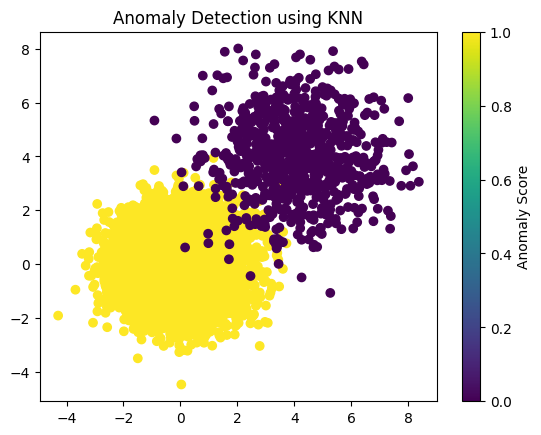

Detected anomalies: [9200 9201 9202 9203 9204 9205 9206 9207 9208 9209 9210 9211 9212 9213
 9214 9215 9216 9217 9218 9219 9220 9221 9222 9223 9224 9225 9226 9227
 9228 9229 9230 9231 9232 9233 9234 9235 9236 9237 9238 9239 9240 9241
 9242 9243 9244 9245 9246 9247 9248 9249 9250 9251 9252 9253 9254 9255
 9256 9257 9258 9259 9260 9261 9262 9263 9264 9265 9266 9267 9268 9269
 9270 9271 9272 9273 9274 9275 9276 9277 9278 9279 9280 9281 9282 9283
 9284 9285 9286 9287 9288 9289 9290 9291 9292 9293 9294 9295 9296 9297
 9298 9299 9300 9301 9302 9303 9304 9305 9306 9307 9308 9309 9310 9311
 9312 9313 9314 9315 9316 9317 9318 9319 9320 9321 9322 9323 9324 9325
 9326 9327 9328 9329 9330 9331 9332 9333 9334 9335 9336 9337 9338 9339
 9340 9341 9342 9343 9344 9345 9346 9347 9348 9349 9350 9351 9352 9353
 9354 9355 9356 9357 9358 9359 9360 9361 9362 9363 9364 9365 9366 9367
 9368 9369 9370 9371 9372 9373 9374 9375 9376 9377 9378 9379 9380 9381
 9382 9383 9384 9385 9386 9387 9388 9389 9390 9391 9392 9

In [ ]:
data = data_big
labels = labels_big

# Initialize and fit the KNN model
k = 5  # Adjust the number of neighbors as needed
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(data, labels)

# Predict whether each data point is an anomaly (0 for anomalies, 1 for normal data)
predictions = clf.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using KNN")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == 0)[0]
print("Detected anomalies:", anomalies_indices)

**Evalution of Model**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred_labels = np.where(predictions == 1, 1, 0)

# --- Classification report ---
print("Classification Report:")
print(classification_report(labels, pred_labels, target_names=["anomaly", "normal"]))

# --- Confusion matrix ---
print("Confusion Matrix:")
print(confusion_matrix(labels, pred_labels))

Classification Report:
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00       800
      normal       1.00      1.00      1.00      9200

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
[[ 800    0]
 [   0 9200]]


**Anomaly explaination function**


In [ ]:
# ---------------------------
# Function to explain anomaly
# ---------------------------
def explain_anomaly(idx, data, labels, model, k=5):
    sample = data[idx].reshape(1, -1)
    distances, indices = model.kneighbors(sample)

    print(f"\n Anomaly explanation for index {idx}:")
    print(f"Point: {data[idx]}")
    print(f"Label: {labels[idx]} (0 = anomaly, 1 = normal)")

    # ---- Distance-based anomaly score ----
    anomaly_score = distances.mean()
    print(f"\n[1] Distance-based anomaly score: {anomaly_score:.3f}")

    # ---- Prototype explanation (nearest normal neighbor) ----
    # among neighbors, pick the closest one with label=1
    neighbor_labels = labels[indices[0]]
    neighbor_points = data[indices[0]]
    normal_mask = neighbor_labels == 1

    if np.any(normal_mask):
        proto_point = neighbor_points[normal_mask][0]
        proto_dist = distances[0][normal_mask][0]
        print(f"[2] Prototype explanation:")
        print(f"   Nearest normal prototype = {proto_point}, distance = {proto_dist:.3f}")
    else:
        print("[2] No normal prototype found among neighbors.")

    # ---- Counterfactual explanation (minimal shift to nearest normal) ----
    if np.any(normal_mask):
        delta = proto_point - data[idx]
        print(f"[3] Counterfactual explanation:")
        print(f"   To be normal, shift features by {delta}")
        print(f"   New (counterfactual) point = {data[idx] + delta}")
    else:
        print("[3] No counterfactual possible (no normal neighbor).")

    # ---- Visualization (only works for 2D) ----
    if data.shape[1] == 2:
        plt.scatter(data[:,0], data[:,1], c=labels, cmap="coolwarm", alpha=0.6, label="Data")
        plt.scatter(sample[:,0], sample[:,1], c="yellow", edgecolor="black", s=120, marker="*", label="Anomaly")
        plt.scatter(data[indices[0],0], data[indices[0],1], c="lime", edgecolor="black", s=80, marker="o", label="Neighbors")
        if np.any(normal_mask):
            plt.scatter(proto_point[0], proto_point[1], c="blue", edgecolor="black", s=150, marker="D", label="Prototype")
        plt.legend()
        plt.title(f"Anomaly {idx} with {k} nearest neighbors")
        plt.show()


 Anomaly explanation for index 300:
Point: [5.13548292 2.61675201]
Label: 0.0 (0 = anomaly, 1 = normal)

[1] Distance-based anomaly score: 1.240
[2] No normal prototype found among neighbors.
[3] No counterfactual possible (no normal neighbor).


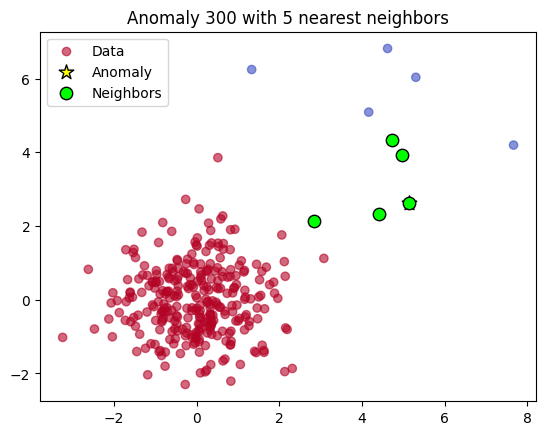

In [ ]:
# ---------------------------
# Pick one anomaly to explain
# ---------------------------
anomaly_indices = np.where(labels_small == 0)[0]
explain_anomaly(anomaly_indices[0], data_small, labels_small, clf, k=5)